In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from category_encoders import TargetEncoder
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch


In [2]:
df = pd.read_csv("E:/DSML-Notes/scaler_clustering.csv")

In [3]:
df.drop(columns="Unnamed: 0",inplace=True)

In [4]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [6]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

We can see missing data in company hash, orgyear and job position

In [7]:
df.drop_duplicates(keep="first",inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205809 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205765 non-null  object 
 1   email_hash        205809 non-null  object 
 2   orgyear           205723 non-null  float64
 3   ctc               205809 non-null  int64  
 4   job_position      153261 non-null  object 
 5   ctc_updated_year  205809 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [9]:
df = df.dropna(subset = ["orgyear","company_hash"],axis = 0)

Dropping the missing values in both the columns as they are negligible

In [10]:
df["YOE"] = 2024 - df["orgyear"]

C:\Users\Asus\AppData\Local\Temp\ipykernel_2868\341203172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YOE"] = 2024 - df["orgyear"]


Creating a new feature called Years of Experience

In [11]:
cols = df.columns.to_list()

cols.remove("job_position")

cols

['company_hash', 'email_hash', 'orgyear', 'ctc', 'ctc_updated_year', 'YOE']

In [12]:
# plt.scatter(x = df[target],y=df["ctc"])

In [13]:
knn_df = df[["ctc","job_position"]].dropna(axis=0)

In [14]:
int_df = knn_df.groupby("job_position")["ctc"].mean()

In [15]:
int_df=int_df.reset_index()

In [16]:
index=int_df["ctc"].argsort()

In [17]:
int_df.iloc[index][::-1]

,job_position,ctc
338,Jharkhand,100000000.0
215,Data entry,100000000.0
5,7033771951,100000000.0
185,Computer Scientist 2,100000000.0
150,Business Man,100000000.0
...,...,...
344,Junior consultant,10000.0
36,Any technical,10000.0
291,Full-stack web developer,7500.0
915,Technical consultant,2000.0


In [18]:
def func(mystring):
    return re.sub('[^A-Za-z0-9]+', '', mystring)

In [19]:
df["company_hash"] = df["company_hash"].apply(func)

C:\Users\Asus\AppData\Local\Temp\ipykernel_2868\1105003756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["company_hash"] = df["company_hash"].apply(func)


using regular expresion to clean the string in company hash

In [20]:
df["email_hash"].nunique()

153333

In [21]:
df["email_hash"].value_counts()

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
                                                                    ..
049d9f3080422ff65b4259f39078dab4feb89c8325441ab26a5bb27a97310efd     1
575a861ee22ac509439fdfd49cefee14ecbff6e3e44dfd5b657d24a1809249bb     1
6846294b3aca2d2221ff3961abf47d5eedf8cc41232e7b959841643570a5df29     1
489ead10d94217f60db56a1c2fcd1ae10b455fff981b09f8bc6f803fd1a8cc7c     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: count, Length: 153333, dtype: int64

In [22]:
df[df["company_hash"] == "atrgxnntxzaxv"][["company_hash","email_hash"]].value_counts()

company_hash   email_hash                                                      
atrgxnntxzaxv  0abaddb8cb2925b7bfcda79f3d533ad76c6c7ed01dadd41792aaeb850546966b    1
               0d2f25432591093f5907a8681d600f869bbe7c2ae39cd715b06f76c9c192e7da    1
               696f674fbc0d337b20152f91c43082bafaa243da70932c1c543fa3a0e028c63e    1
               6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af    1
               a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475fad6ba28476f9f98cb    1
               ab2b1b176cd5831ff3002043c82b075812a12ba212fa18c2c5098881009fd863    1
               b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef5dda4239da293f3b5c    1
               dc8d39f3e9dd9f7576194e1a13c233bfe704bf9a72df994afc99dcfd2e6e14ff    1
               ffc974693a2bfd0326c707d8460d6783861a9497e538e2a67e5ecc9909d23c55    1
Name: count, dtype: int64

In [23]:
columns = df.columns.to_list()

In [24]:
columns.remove("company_hash")

In [25]:
columns

['email_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year', 'YOE']

In [26]:
cat_df = df.select_dtypes(include=["object"])

In [27]:
counts_df = df.groupby("job_position")["job_position"].count()

In [28]:
counts_df = counts_df.reset_index(name="count")

In [29]:
index = counts_df["count"].argsort()

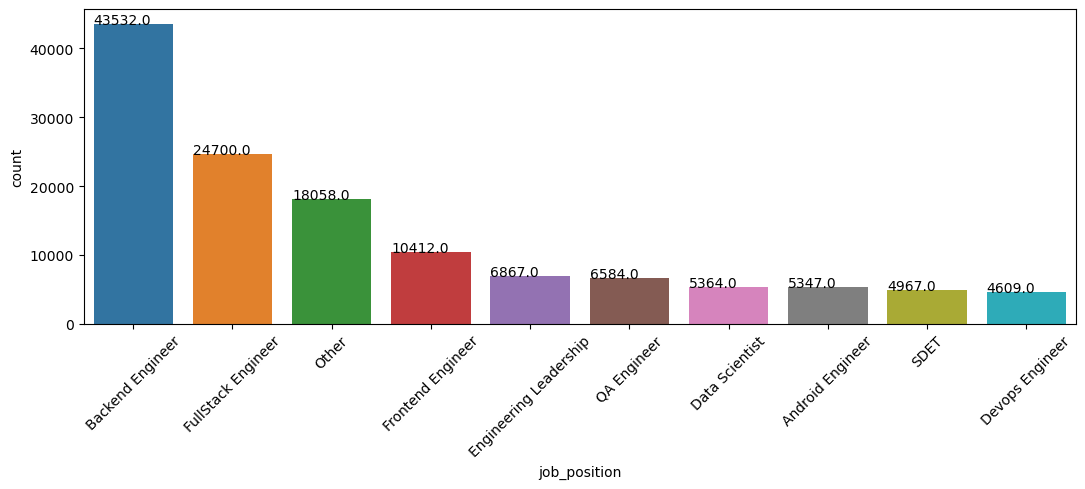

In [30]:
plt.figure(figsize=(11,5))
plot_data = counts_df.iloc[index[::-1]].head(10)
barplot = sns.barplot(x = plot_data["job_position"],y = plot_data["count"])
for p in barplot.patches:
    barplot.annotate(p.get_height(),(p.get_x(),p.get_height()))
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Most of the employees are backend engineers(43k+) followed by fullstack engineers(24k+), there's also the other category, not sure what role it is.

In [31]:
df["email_hash"].value_counts().head(10)

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
Name: count, dtype: int64

In [32]:
num_df = df.select_dtypes(include=["int","float"])

In [33]:
num_cols = num_df.columns

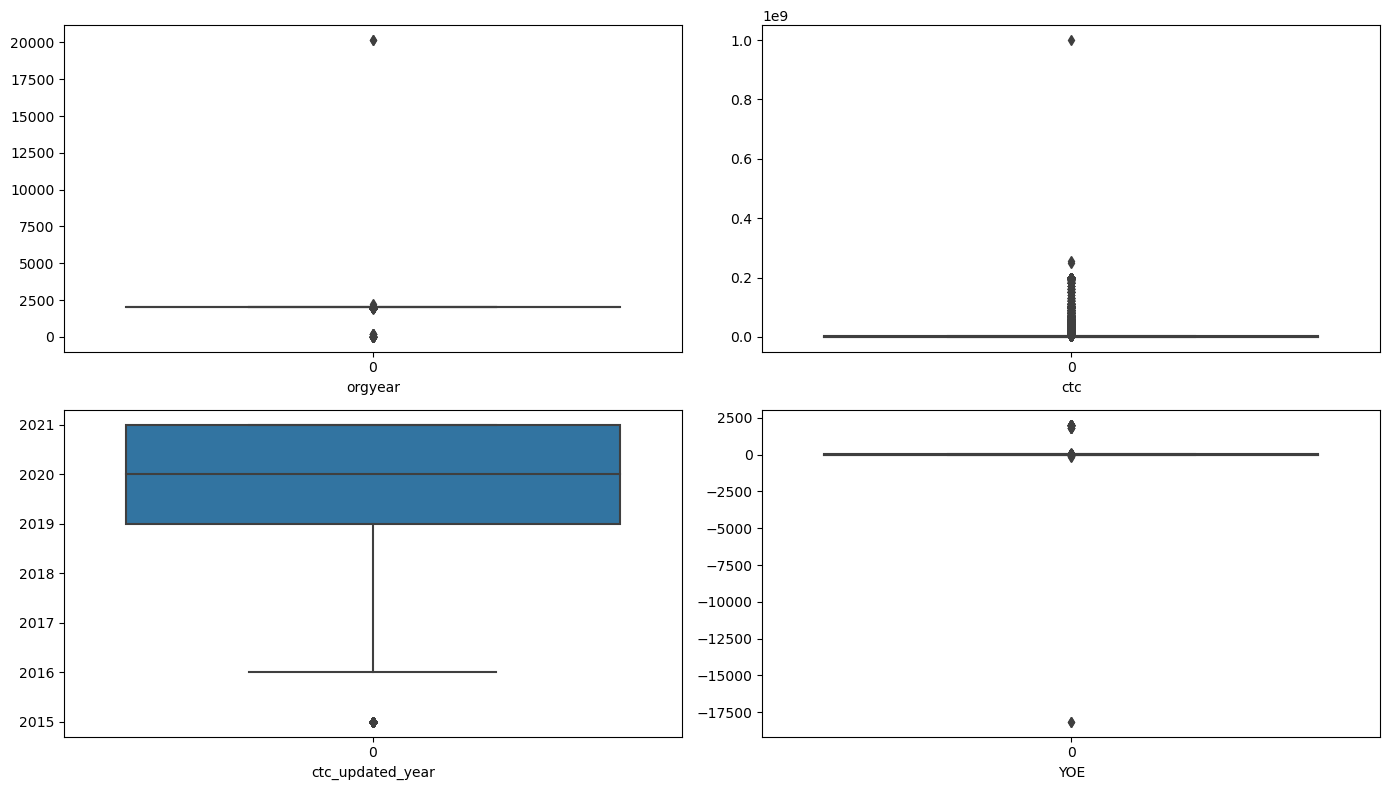

In [34]:
plt.figure(figsize=(14,8))
n=len(num_cols)
for i in range(n):
    plt.subplot(n//2,n//2,i+1)
    sns.boxplot(num_df[num_cols[i]])
    plt.xlabel(num_cols[i])
plt.tight_layout()
plt.show()

we donot see much of outliers in any other columns except ctc. There might be some sort of error due to manual entry.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205679 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205679 non-null  object 
 1   email_hash        205679 non-null  object 
 2   orgyear           205679 non-null  float64
 3   ctc               205679 non-null  int64  
 4   job_position      153186 non-null  object 
 5   ctc_updated_year  205679 non-null  float64
 6   YOE               205679 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 20.6+ MB


In [36]:
df.isna().sum()*100/df.shape[0]

company_hash         0.000000
email_hash           0.000000
orgyear              0.000000
ctc                  0.000000
job_position        25.521808
ctc_updated_year     0.000000
YOE                  0.000000
dtype: float64

In [37]:
# null_df = df.isna()

In [38]:
null_df = df[df["job_position"].isna()]

In [39]:
non_null_df = df[df["job_position"].isna() == False]

In [40]:
TE = TargetEncoder()

In [41]:
LE = LabelEncoder()

In [42]:

non_null_df["job_position"] = LE.fit_transform(non_null_df["job_position"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_2868\1541560523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_null_df["job_position"] = LE.fit_transform(non_null_df["job_position"])


In [43]:
non_null_df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,457,2020.0,8.0
1,qtrxvzwtxzegwgbbrxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,292,2019.0,6.0
2,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,140,2020.0,9.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,140,2019.0,7.0
4,qxensqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,292,2019.0,7.0
...,...,...,...,...,...,...,...
205324,wosxzntqzvnxgzvr,ee1e251ebb54cffeddc09244bbc0ed122a1cf59511bbc1...,2016.0,1500000,292,2021.0,8.0
205326,xzegojo,aec7061c552cfd56fe635ca0e9d347d2e63a95dbcd2ef8...,2019.0,1200000,292,2021.0,5.0
205327,wgbuzgcvwgznqvwn,251f5f33672f58c65f43e94d0fc0fef69a7f6149b3b4db...,2015.0,1000000,208,2021.0,9.0
205328,ahzzyhbmj,617a49afbc5efc0f1692780d20fc566ba4ed4f1125491c...,2019.0,1100000,208,2021.0,5.0


In [44]:
transformed_TE = TE.fit_transform(non_null_df[["email_hash","company_hash"]],non_null_df["job_position"])

In [45]:
non_null_df["email_hash"] = transformed_TE["email_hash"]
non_null_df["company_hash"] = transformed_TE["company_hash"]

C:\Users\Asus\AppData\Local\Temp\ipykernel_2868\2019994382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_null_df["email_hash"] = transformed_TE["email_hash"]
C:\Users\Asus\AppData\Local\Temp\ipykernel_2868\2019994382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_null_df["company_hash"] = transformed_TE["company_hash"]


Transformed whole dataset into numeric so that we can predict the missing values in job position using knn

In [46]:
null_df['job_position'] = -1


C:\Users\Asus\AppData\Local\Temp\ipykernel_2868\3173166682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df['job_position'] = -1


In [47]:

df_null_encoded = TE.transform(null_df[['email_hash', 'company_hash']])


In [48]:

null_df["email_hash"] = df_null_encoded["email_hash"]
null_df["company_hash"] = df_null_encoded["company_hash"]

C:\Users\Asus\AppData\Local\Temp\ipykernel_2868\1529606193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df["email_hash"] = df_null_encoded["email_hash"]
C:\Users\Asus\AppData\Local\Temp\ipykernel_2868\1529606193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df["company_hash"] = df_null_encoded["company_hash"]


In [49]:
null_df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
8,281.331343,303.809160,2020.0,450000,-1,2019.0,4.0
9,303.809160,303.809160,2019.0,360000,-1,2019.0,5.0
12,284.448276,284.899114,2020.0,800000,-1,2020.0,4.0
17,336.932911,303.809160,2020.0,1400000,-1,2019.0,4.0
18,329.353321,323.740587,2018.0,100000,-1,2021.0,6.0
...,...,...,...,...,...,...,...
205838,303.809160,303.809160,2008.0,220000,-1,2019.0,16.0
205839,384.514498,303.809160,2017.0,500000,-1,2020.0,7.0
205840,238.885700,303.809160,2021.0,700000,-1,2021.0,3.0
205841,330.246003,303.809160,2019.0,5100000,-1,2019.0,5.0


In [50]:
non_null_df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
0,307.158937,303.056050,2016.0,1100000,457,2020.0,8.0
1,317.190184,313.836731,2018.0,449999,292,2019.0,6.0
2,278.506335,280.572656,2015.0,2000000,140,2020.0,9.0
3,325.084804,282.496200,2017.0,700000,140,2019.0,7.0
4,306.616842,322.560572,2017.0,1400000,292,2019.0,7.0


In [51]:
null_df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
8,281.331343,303.809160,2020.0,450000,-1,2019.0,4.0
9,303.809160,303.809160,2019.0,360000,-1,2019.0,5.0
12,284.448276,284.899114,2020.0,800000,-1,2020.0,4.0
17,336.932911,303.809160,2020.0,1400000,-1,2019.0,4.0
18,329.353321,323.740587,2018.0,100000,-1,2021.0,6.0


In [52]:
scaler = MinMaxScaler()

In [53]:
# train_data = scaler.fit_transform(non_null_df)

In [54]:
y_train = non_null_df["job_position"]
x_train = non_null_df.drop("job_position",axis =1)

In [55]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,train_size=0.75)

In [56]:
x_train

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YOE
145448,364.696811,323.740587,2020.0,400000,2021.0,4.0
68279,294.261284,294.261284,2019.0,120000,2021.0,5.0
83408,283.409678,283.409678,2015.0,1700000,2021.0,9.0
56419,312.340781,302.272688,2013.0,1500000,2019.0,11.0
187812,301.779391,298.942369,2016.0,120000,2019.0,8.0
...,...,...,...,...,...,...
89267,325.539444,323.740587,2017.0,550000,2021.0,7.0
106542,364.696811,323.740587,2017.0,400000,2019.0,7.0
197547,253.469170,282.496200,2013.0,2600000,2015.0,11.0
78869,393.694534,295.467018,2018.0,600000,2019.0,6.0


In [57]:
y_test = null_df["job_position"]
x_test = null_df.drop("job_position",axis =1)

In [58]:
x_test.head()

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YOE
8,281.331343,303.809160,2020.0,450000,2019.0,4.0
9,303.809160,303.809160,2019.0,360000,2019.0,5.0
12,284.448276,284.899114,2020.0,800000,2020.0,4.0
17,336.932911,303.809160,2020.0,1400000,2019.0,4.0
18,329.353321,323.740587,2018.0,100000,2021.0,6.0


### Knn

In [59]:
knn = KNeighborsClassifier(n_neighbors=6)

In [60]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [61]:
type(y_train)

pandas.core.series.Series

In [62]:
knn.score(x_val,y_val)

0.607619395775126

In [63]:
# test_data = scaler.transform(null_df)

In [64]:
y_train

145448    457
68279      33
83408      33
56419     292
187812    287
         ... 
89267     457
106542    457
197547    140
78869     457
91185     549
Name: job_position, Length: 114889, dtype: int32

In [65]:
x_train = scaler.fit_transform(x_train)

In [66]:
x_val = scaler.transform(x_val)

In [67]:
x_test = scaler.transform(x_test)

In [68]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [69]:
y_pred_val  = knn.predict(x_val)

In [70]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred_val)

In [71]:
accuracy

0.8134840849152675

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_val, y_pred_val,average="weighted")
recall = recall_score(y_val, y_pred_val,average="weighted")
f1 = f1_score(y_val, y_pred_val,average="weighted")


E:\AAAA DSML\ana\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\AAAA DSML\ana\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
print(f"precision: {precision}, Recall: {recall}, F1: {f1}")

precision: 0.8016755331212824, Recall: 0.8134840849152675, F1: 0.8055234437208153


In [74]:
y_pred = knn.predict(x_test)

In [75]:
# pd.concat(x_test,x_val,x_test)

In [76]:
null_df["job_position"] = y_pred

C:\Users\Asus\AppData\Local\Temp\ipykernel_2868\2365377626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df["job_position"] = y_pred


In [77]:
final_cleaned_df = pd.concat([non_null_df,null_df],axis=0,ignore_index=True)

In [78]:
final_cleaned_df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
0,307.158937,303.056050,2016.0,1100000,457,2020.0,8.0
1,317.190184,313.836731,2018.0,449999,292,2019.0,6.0
2,278.506335,280.572656,2015.0,2000000,140,2020.0,9.0
3,325.084804,282.496200,2017.0,700000,140,2019.0,7.0
4,306.616842,322.560572,2017.0,1400000,292,2019.0,7.0


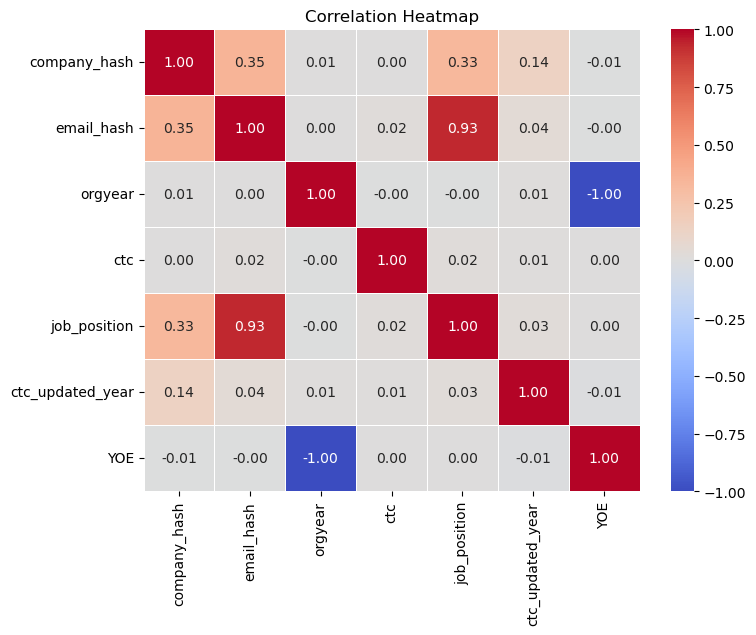

In [79]:

correlation_matrix =final_cleaned_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- We have high correlation between jobposition and email hash, which is expected as the emails hash is specific to their company.
- We see a negative correlation between orgyear and YOP. which is expected as joining date increases,  years of experience decreases.

## Clustering

In [80]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
0,atrgxnntxzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,8.0
1,qtrxvzwtxzegwgbbrxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,6.0
2,ojzwnvwnxwvx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,9.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,7.0
4,qxensqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,7.0
...,...,...,...,...,...,...,...
205838,vuurtxzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0,16.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0,7.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0,3.0
205841,zgnvuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0,5.0


In [81]:
l = final_cleaned_df["job_position"]

In [82]:
original_labels = LE.inverse_transform(l)


In [83]:
final_cleaned_df["job_position_original"] = original_labels

In [84]:
final_cleaned_df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original
0,307.158937,303.056050,2016.0,1100000,457,2020.0,8.0,Other
1,317.190184,313.836731,2018.0,449999,292,2019.0,6.0,FullStack Engineer
2,278.506335,280.572656,2015.0,2000000,140,2020.0,9.0,Backend Engineer
3,325.084804,282.496200,2017.0,700000,140,2019.0,7.0,Backend Engineer
4,306.616842,322.560572,2017.0,1400000,292,2019.0,7.0,FullStack Engineer
...,...,...,...,...,...,...,...,...
205674,303.809160,303.809160,2008.0,220000,140,2019.0,16.0,Backend Engineer
205675,384.514498,303.809160,2017.0,500000,292,2020.0,7.0,FullStack Engineer
205676,238.885700,303.809160,2021.0,700000,140,2021.0,3.0,Backend Engineer
205677,330.246003,303.809160,2019.0,5100000,292,2019.0,5.0,FullStack Engineer


In [85]:
mean_dept = final_cleaned_df.groupby(["company_hash","job_position","YOE"])["ctc"].mean()

In [86]:
mean_dept = mean_dept.reset_index()

In [87]:
mean_dept = mean_dept.rename(columns={"ctc":"MeanCTCDept"})

In [88]:
final_cleaned_df =  final_cleaned_df.merge(mean_dept,how="left",left_on=["company_hash","job_position","YOE"],right_on=["company_hash","job_position","YOE"])

In [89]:
final_cleaned_df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original,MeanCTCDept
0,307.158937,303.056050,2016.0,1100000,457,2020.0,8.0,Other,1.100000e+06
1,317.190184,313.836731,2018.0,449999,292,2019.0,6.0,FullStack Engineer,7.744443e+05
2,278.506335,280.572656,2015.0,2000000,140,2020.0,9.0,Backend Engineer,1.704528e+06
3,325.084804,282.496200,2017.0,700000,140,2019.0,7.0,Backend Engineer,1.447500e+06
4,306.616842,322.560572,2017.0,1400000,292,2019.0,7.0,FullStack Engineer,1.400000e+06
...,...,...,...,...,...,...,...,...,...
205674,303.809160,303.809160,2008.0,220000,140,2019.0,16.0,Backend Engineer,1.522286e+06
205675,384.514498,303.809160,2017.0,500000,292,2020.0,7.0,FullStack Engineer,1.150000e+06
205676,238.885700,303.809160,2021.0,700000,140,2021.0,3.0,Backend Engineer,5.000000e+05
205677,330.246003,303.809160,2019.0,5100000,292,2019.0,5.0,FullStack Engineer,2.796597e+07


Mean CTC for each company

In [90]:
def cluster_dept(x):
    if x["ctc"] > 0 and x["ctc"] < x["MeanCTCDept"]/2:
        return 3
    elif x["ctc"] > x["MeanCTCDept"]/2 and x["ctc"] <= x["MeanCTCDept"]:
        return 2
        
    else:
        return 1

In [91]:
final_cleaned_df["flagDept"] = final_cleaned_df.apply(lambda x: cluster_dept(x), axis=1)

In [92]:
final_cleaned_df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original,MeanCTCDept,flagDept
0,307.158937,303.056050,2016.0,1100000,457,2020.0,8.0,Other,1.100000e+06,2
1,317.190184,313.836731,2018.0,449999,292,2019.0,6.0,FullStack Engineer,7.744443e+05,2
2,278.506335,280.572656,2015.0,2000000,140,2020.0,9.0,Backend Engineer,1.704528e+06,1
3,325.084804,282.496200,2017.0,700000,140,2019.0,7.0,Backend Engineer,1.447500e+06,3
4,306.616842,322.560572,2017.0,1400000,292,2019.0,7.0,FullStack Engineer,1.400000e+06,2
...,...,...,...,...,...,...,...,...,...,...
205674,303.809160,303.809160,2008.0,220000,140,2019.0,16.0,Backend Engineer,1.522286e+06,3
205675,384.514498,303.809160,2017.0,500000,292,2020.0,7.0,FullStack Engineer,1.150000e+06,3
205676,238.885700,303.809160,2021.0,700000,140,2021.0,3.0,Backend Engineer,5.000000e+05,1
205677,330.246003,303.809160,2019.0,5100000,292,2019.0,5.0,FullStack Engineer,2.796597e+07,3


In [93]:
job_mean = final_cleaned_df.groupby(["company_hash","job_position"])["ctc"].mean()

In [94]:
job_mean = job_mean.reset_index()

In [95]:
job_mean = job_mean.rename(columns={"ctc":"job_mean"})

In [96]:
job_mean

,company_hash,job_position,job_mean
0,169.684353,33,7.483333e+04
1,169.684353,140,4.910328e+06
2,169.684353,208,4.000000e+05
3,169.684353,255,7.201000e+06
4,169.684353,287,1.240000e+05
...,...,...,...
26004,474.209938,580,5.200000e+05
26005,474.209938,629,4.000000e+05
26006,474.209938,843,4.000000e+05
26007,474.209938,871,4.315000e+05


In [97]:
final_cleaned_df =  final_cleaned_df.merge(job_mean,how="left",left_on=["company_hash","job_position"],right_on=["company_hash","job_position"])

In [98]:
final_cleaned_df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original,MeanCTCDept,flagDept,job_mean
0,307.158937,303.056050,2016.0,1100000,457,2020.0,8.0,Other,1.100000e+06,2,1.085000e+06
1,317.190184,313.836731,2018.0,449999,292,2019.0,6.0,FullStack Engineer,7.744443e+05,2,1.197581e+06
2,278.506335,280.572656,2015.0,2000000,140,2020.0,9.0,Backend Engineer,1.704528e+06,1,3.213453e+06
3,325.084804,282.496200,2017.0,700000,140,2019.0,7.0,Backend Engineer,1.447500e+06,3,1.553548e+06
4,306.616842,322.560572,2017.0,1400000,292,2019.0,7.0,FullStack Engineer,1.400000e+06,2,1.132222e+06
...,...,...,...,...,...,...,...,...,...,...,...
205674,303.809160,303.809160,2008.0,220000,140,2019.0,16.0,Backend Engineer,1.522286e+06,3,1.009817e+06
205675,384.514498,303.809160,2017.0,500000,292,2020.0,7.0,FullStack Engineer,1.150000e+06,3,9.208333e+05
205676,238.885700,303.809160,2021.0,700000,140,2021.0,3.0,Backend Engineer,5.000000e+05,1,1.386337e+06
205677,330.246003,303.809160,2019.0,5100000,292,2019.0,5.0,FullStack Engineer,2.796597e+07,3,2.758219e+07


segmenting the employees based on the department on their company

In [99]:
def cluster_job(x):
    if x["ctc"] > 0 and x["ctc"] < x["job_mean"]/2:
        return 3
    elif x["ctc"] > x["job_mean"]/2 and x["ctc"] <= x["job_mean"]:
        return 2
        
    else:
        return 1

In [100]:
final_cleaned_df["flagJob"] = final_cleaned_df.apply(lambda x: cluster_job(x), axis=1)

In [101]:
final_cleaned_df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original,MeanCTCDept,flagDept,job_mean,flagJob
0,307.158937,303.056050,2016.0,1100000,457,2020.0,8.0,Other,1.100000e+06,2,1.085000e+06,1
1,317.190184,313.836731,2018.0,449999,292,2019.0,6.0,FullStack Engineer,7.744443e+05,2,1.197581e+06,3
2,278.506335,280.572656,2015.0,2000000,140,2020.0,9.0,Backend Engineer,1.704528e+06,1,3.213453e+06,2
3,325.084804,282.496200,2017.0,700000,140,2019.0,7.0,Backend Engineer,1.447500e+06,3,1.553548e+06,3
4,306.616842,322.560572,2017.0,1400000,292,2019.0,7.0,FullStack Engineer,1.400000e+06,2,1.132222e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...
205674,303.809160,303.809160,2008.0,220000,140,2019.0,16.0,Backend Engineer,1.522286e+06,3,1.009817e+06,3
205675,384.514498,303.809160,2017.0,500000,292,2020.0,7.0,FullStack Engineer,1.150000e+06,3,9.208333e+05,2
205676,238.885700,303.809160,2021.0,700000,140,2021.0,3.0,Backend Engineer,5.000000e+05,1,1.386337e+06,2
205677,330.246003,303.809160,2019.0,5100000,292,2019.0,5.0,FullStack Engineer,2.796597e+07,3,2.758219e+07,3


In [102]:
comp_mean = final_cleaned_df.groupby(["company_hash"])["ctc"].mean()

In [103]:
comp_mean = comp_mean.reset_index()

In [104]:
comp_mean = comp_mean.rename(columns={"ctc":"comp_mean"})

In [105]:
comp_mean

,company_hash,comp_mean
0,169.684353,6.339767e+06
1,185.369981,1.922000e+06
2,198.339561,1.770318e+06
3,207.206584,2.838652e+06
4,213.452903,3.121900e+06
...,...,...
4215,446.362404,1.002000e+06
4216,454.771648,8.805660e+05
4217,456.640584,8.037720e+06
4218,461.743570,1.150789e+06


In [106]:
final_cleaned_df =  final_cleaned_df.merge(comp_mean,how="left",left_on=["company_hash"],right_on=["company_hash"])

In [107]:
final_cleaned_df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original,MeanCTCDept,flagDept,job_mean,flagJob,comp_mean
0,307.158937,303.056050,2016.0,1100000,457,2020.0,8.0,Other,1.100000e+06,2,1.085000e+06,1,1.115667e+06
1,317.190184,313.836731,2018.0,449999,292,2019.0,6.0,FullStack Engineer,7.744443e+05,2,1.197581e+06,3,2.197334e+06
2,278.506335,280.572656,2015.0,2000000,140,2020.0,9.0,Backend Engineer,1.704528e+06,1,3.213453e+06,2,3.140557e+06
3,325.084804,282.496200,2017.0,700000,140,2019.0,7.0,Backend Engineer,1.447500e+06,3,1.553548e+06,3,1.713929e+06
4,306.616842,322.560572,2017.0,1400000,292,2019.0,7.0,FullStack Engineer,1.400000e+06,2,1.132222e+06,1,1.053846e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205674,303.809160,303.809160,2008.0,220000,140,2019.0,16.0,Backend Engineer,1.522286e+06,3,1.009817e+06,3,3.365500e+06
205675,384.514498,303.809160,2017.0,500000,292,2020.0,7.0,FullStack Engineer,1.150000e+06,3,9.208333e+05,2,2.119245e+06
205676,238.885700,303.809160,2021.0,700000,140,2021.0,3.0,Backend Engineer,5.000000e+05,1,1.386337e+06,2,1.404485e+06
205677,330.246003,303.809160,2019.0,5100000,292,2019.0,5.0,FullStack Engineer,2.796597e+07,3,2.758219e+07,3,5.537303e+06


Segmenting only based on their company

In [108]:
def cluster_comp(x):
    if x["ctc"] > 0 and x["ctc"] < x["comp_mean"]/2:
        return 3
    elif x["ctc"] > x["comp_mean"]/2 and x["ctc"] <= x["comp_mean"]:
        return 2
        
    else:
        return 1

In [109]:
final_cleaned_df["flagcomp"] = final_cleaned_df.apply(lambda x: cluster_comp(x), axis=1)

In [110]:
final_cleaned_df["flagDept"] = final_cleaned_df["flagDept"].astype("str")

In [111]:
final_cleaned_df["flagJob"] = final_cleaned_df["flagJob"].astype("str")

In [112]:
final_cleaned_df["flagcomp"] = final_cleaned_df["flagcomp"].astype("str")

In [113]:
final_cleaned_df["Cluster"] = final_cleaned_df["flagDept"]+final_cleaned_df["flagJob"]+final_cleaned_df["flagcomp"]

In [114]:
final_cleaned_df["Cluster"] = final_cleaned_df["Cluster"].astype("int")

In [115]:
final_cleaned_df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original,MeanCTCDept,flagDept,job_mean,flagJob,comp_mean,flagcomp,Cluster
0,307.158937,303.056050,2016.0,1100000,457,2020.0,8.0,Other,1.100000e+06,2,1.085000e+06,1,1.115667e+06,2,212
1,317.190184,313.836731,2018.0,449999,292,2019.0,6.0,FullStack Engineer,7.744443e+05,2,1.197581e+06,3,2.197334e+06,3,233
2,278.506335,280.572656,2015.0,2000000,140,2020.0,9.0,Backend Engineer,1.704528e+06,1,3.213453e+06,2,3.140557e+06,2,122
3,325.084804,282.496200,2017.0,700000,140,2019.0,7.0,Backend Engineer,1.447500e+06,3,1.553548e+06,3,1.713929e+06,3,333
4,306.616842,322.560572,2017.0,1400000,292,2019.0,7.0,FullStack Engineer,1.400000e+06,2,1.132222e+06,1,1.053846e+06,1,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205674,303.809160,303.809160,2008.0,220000,140,2019.0,16.0,Backend Engineer,1.522286e+06,3,1.009817e+06,3,3.365500e+06,3,333
205675,384.514498,303.809160,2017.0,500000,292,2020.0,7.0,FullStack Engineer,1.150000e+06,3,9.208333e+05,2,2.119245e+06,3,323
205676,238.885700,303.809160,2021.0,700000,140,2021.0,3.0,Backend Engineer,5.000000e+05,1,1.386337e+06,2,1.404485e+06,3,123
205677,330.246003,303.809160,2019.0,5100000,292,2019.0,5.0,FullStack Engineer,2.796597e+07,3,2.758219e+07,3,5.537303e+06,2,332


In [116]:
cluster_data = final_cleaned_df.loc[:,"company_hash":"YOE"]

In [117]:
index = final_cleaned_df["Cluster"].argsort()

In [118]:
final_cleaned_df.iloc[index.values].head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original,MeanCTCDept,flagDept,job_mean,flagJob,comp_mean,flagcomp,Cluster
116524,334.263284,334.263284,2011.0,2000000,457,2021.0,13.0,Other,1.675000e+06,1,7.830714e+05,1,7.549259e+05,1,111
42731,302.134018,302.272688,2017.0,2050000,292,2021.0,7.0,FullStack Engineer,1.812384e+06,1,1.703755e+06,1,1.696507e+06,1,111
157000,302.134018,302.134018,2016.0,1800000,292,2020.0,8.0,FullStack Engineer,1.143475e+06,1,1.703755e+06,1,1.696507e+06,1,111
119880,357.839141,302.272688,2012.0,1500000,292,2021.0,12.0,FullStack Engineer,1.042840e+06,1,1.291302e+06,1,1.408587e+06,1,111
84423,234.556622,335.710566,2017.0,2000000,549,2021.0,7.0,Research Engineers,1.508000e+06,1,1.750182e+06,1,1.807504e+06,1,111
15935,282.496200,282.496200,2016.0,80000000,140,2020.0,8.0,Backend Engineer,1.609050e+06,1,1.854254e+06,1,1.888250e+06,1,111
96528,288.729093,297.458675,2005.0,12100000,255,2017.0,19.0,Engineering Leadership,4.714000e+06,1,2.916378e+06,1,2.791879e+06,1,111
188620,275.167171,282.496200,2005.0,5400000,140,2019.0,19.0,Backend Engineer,4.250000e+06,1,1.620341e+06,1,1.778707e+06,1,111
156976,252.128637,303.809160,2020.0,2600000,140,2020.0,4.0,Backend Engineer,2.049231e+06,1,1.871168e+06,1,1.943726e+06,1,111
188610,303.809160,303.809160,2018.0,4000000,140,2019.0,6.0,Backend Engineer,8.891981e+05,1,1.009817e+06,1,3.365500e+06,1,111


*Top ten employees earning more than their peers*

In [119]:
index = final_cleaned_df["Cluster"].argsort()[::-1]

In [120]:
index

205678    102839
205677    175003
205676    175017
205675    133666
205674     68554
           ...  
4          84423
3         119880
2         157000
1          42731
0         116524
Name: Cluster, Length: 205679, dtype: int64

In [121]:
final_cleaned_df.iloc[index.values].head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original,MeanCTCDept,flagDept,job_mean,flagJob,comp_mean,flagcomp,Cluster
102839,223.651194,282.496200,2015.0,21800,140,2019.0,9.0,Backend Engineer,3.081406e+06,3,2.842084e+06,3,3.114688e+06,3,333
175003,282.496200,282.496200,2017.0,500000,140,2021.0,7.0,Backend Engineer,1.058489e+06,3,1.854254e+06,3,1.888250e+06,3,333
175017,301.622146,301.424763,2016.0,500000,287,2021.0,8.0,Frontend Engineer,2.502857e+06,3,1.689975e+06,3,1.719147e+06,3,333
133666,313.836731,302.272688,2020.0,250000,292,2021.0,4.0,FullStack Engineer,7.912500e+05,3,1.143779e+06,3,1.826706e+06,3,333
68554,267.823068,286.332575,2018.0,550000,140,2020.0,6.0,Backend Engineer,1.129141e+06,3,1.790534e+06,3,1.886493e+06,3,333
133668,323.853858,282.496200,2018.0,409999,140,2019.0,6.0,Backend Engineer,3.296824e+06,3,1.386973e+06,3,1.099726e+06,3,333
68553,323.740587,323.740587,2013.0,650000,457,2021.0,11.0,Other,3.221498e+06,3,6.487165e+06,3,6.416358e+06,3,333
175009,396.337371,323.740587,2017.0,100000,457,2021.0,7.0,Other,3.373833e+07,3,1.015844e+07,3,9.689605e+06,3,333
175007,327.618531,303.809160,2019.0,500000,140,2021.0,5.0,Backend Engineer,1.484014e+06,3,1.543092e+06,3,2.381858e+06,3,333
68545,290.432817,290.432817,2016.0,950000,201,2021.0,8.0,Data Analyst,6.234025e+06,3,6.364396e+06,3,6.531240e+06,3,333


*Bottom 10 employees earning less than their peer*

In [122]:
index = final_cleaned_df[final_cleaned_df["YOE"].isin([5,6,7])]["Cluster"].argsort()

In [123]:
final_cleaned_df.iloc[index.values].head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original,MeanCTCDept,flagDept,job_mean,flagJob,comp_mean,flagcomp,Cluster
15230,323.853858,292.514553,2016.0,440000,217,2020.0,8.0,Database Administrator,5.700000e+05,2,6.122222e+05,2,1.099726e+06,3,223
37196,253.363047,282.496200,2014.0,1000000,140,2017.0,10.0,Backend Engineer,1.134648e+06,2,1.367336e+06,2,1.751732e+06,2,222
61814,283.798708,294.075854,2011.0,811000,229,2017.0,13.0,Devops Engineer,8.110000e+05,2,1.201937e+06,2,3.009391e+06,3,223
41867,221.193015,280.572656,2019.0,1500000,140,2021.0,5.0,Backend Engineer,1.460000e+06,1,2.022732e+06,2,2.141649e+06,2,122
37200,267.908722,323.740587,2017.0,1550000,457,2015.0,7.0,Other,1.847636e+06,2,1.949402e+06,2,2.163448e+06,2,222
22716,288.729093,319.936327,2019.0,600000,255,2020.0,5.0,Engineering Leadership,1.025000e+06,2,2.916378e+06,3,2.791879e+06,3,233
41866,294.158815,302.272688,2001.0,300000,292,2021.0,23.0,FullStack Engineer,3.000000e+05,2,1.034085e+06,3,1.181000e+06,3,233
39680,345.575092,323.740587,2017.0,170000,457,2021.0,7.0,Other,2.852576e+06,3,2.719960e+06,3,3.057054e+06,3,333
17189,296.140091,291.353337,2016.0,900000,140,2019.0,8.0,Backend Engineer,9.000000e+05,2,1.251667e+06,2,1.385312e+07,3,223
17190,316.187330,327.111405,2018.0,620000,201,2019.0,6.0,Data Analyst,6.060000e+05,1,8.660000e+05,2,8.891015e+05,2,122


*Top 10 employees having 5/6/7 years of experience earning more than their peers*

In [124]:
index = final_cleaned_df["MeanCTCDept"].argsort()

In [125]:
final_cleaned_df.iloc[index.values].head(10)["company_hash"]

186725    233.857803
184833    233.857803
185912    311.212486
193413    283.410603
66267     329.220619
107714    327.618531
2951      250.190476
96569     317.891855
133426    286.387391
42938     343.256858
Name: company_hash, dtype: float64

*Top 10 Companies*

In [126]:
final_cleaned_df["rank"] = final_cleaned_df.groupby(["company_hash"])["job_position"].rank()

In [127]:
final_cleaned_df[final_cleaned_df["rank"].isin([1,2])]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,job_position_original,MeanCTCDept,flagDept,job_mean,flagJob,comp_mean,flagcomp,Cluster,rank
17,298.171838,291.343576,2018.0,1350000,208,2019.0,6.0,Data Scientist,9.533333e+05,1,9.533333e+05,1,9.400000e+05,1,111,2.0
36,298.373526,282.496200,2017.0,550000,140,2020.0,7.0,Backend Engineer,5.500000e+05,2,5.500000e+05,2,1.119882e+06,3,223,1.0
60,303.550187,280.572656,2017.0,300000,140,2020.0,7.0,Backend Engineer,3.733333e+05,2,3.733333e+05,2,5.026250e+05,2,222,2.0
97,340.133433,323.816146,2011.0,6300000,140,2019.0,13.0,Backend Engineer,6.300000e+06,2,6.300000e+06,2,2.287368e+06,1,221,1.0
100,339.999260,302.272688,2016.0,450000,292,2019.0,8.0,FullStack Engineer,4.500000e+05,2,4.500000e+05,2,4.900000e+05,2,222,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204839,295.041465,303.809160,2016.0,700000,140,2019.0,8.0,Backend Engineer,7.000000e+05,2,2.033333e+06,3,1.542500e+06,3,233,2.0
205000,329.962359,303.809160,2012.0,1000000,292,2015.0,12.0,FullStack Engineer,1.000000e+06,2,1.000000e+06,2,1.480000e+06,2,222,2.0
205184,365.257742,303.809160,2019.0,3100000,140,2019.0,5.0,Backend Engineer,3.100000e+06,2,3.100000e+06,2,1.213055e+06,1,221,1.0
205460,305.982983,303.809160,2018.0,130000,140,2021.0,6.0,Backend Engineer,1.300000e+05,2,8.691667e+05,3,1.022773e+06,3,233,2.0


*Top 2 position in every company*

### Kmeans

In [128]:
k = 4
kmeans = KMeans(random_state=42,n_clusters = k)

In [129]:
kmeans.fit(cluster_data)

E:\AAAA DSML\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [130]:
cluster_data["labels4Cluster"] = kmeans.labels_

In [131]:
# sns.pairplot(cluster_data.iloc[:,:-1])

In [132]:
pca = PCA(n_components=3)
data_3d = pca.fit_transform(cluster_data.iloc[:,:-1])

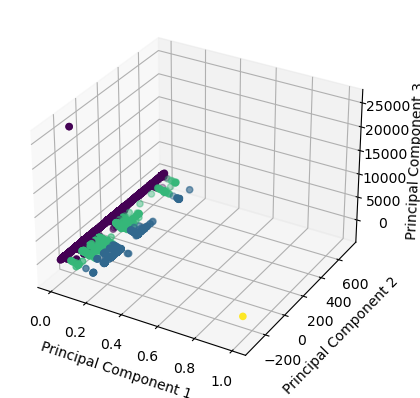

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=cluster_data['labels4Cluster'], cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [134]:
scaled_data = scaler.fit_transform(cluster_data.iloc[:,:-1])

In [135]:
kmeans.fit(scaled_data)

E:\AAAA DSML\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [136]:
cluster_data["kmLabels"] = kmeans.labels_

In [137]:
cluster_data = cluster_data.drop(columns="labels4Cluster")

In [138]:
pca = PCA(n_components=3)
data_3d = pca.fit_transform(cluster_data.iloc[:,:-1])

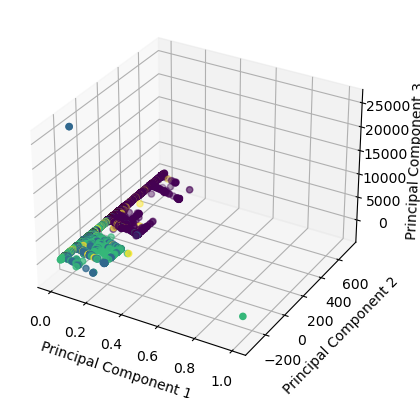

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=cluster_data['kmLabels'], cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [140]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cluster_data.iloc[:,:-1])
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

E:\AAAA DSML\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\AAAA DSML\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\AAAA DSML\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\AAAA DSML\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\AAAA DSML\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The de

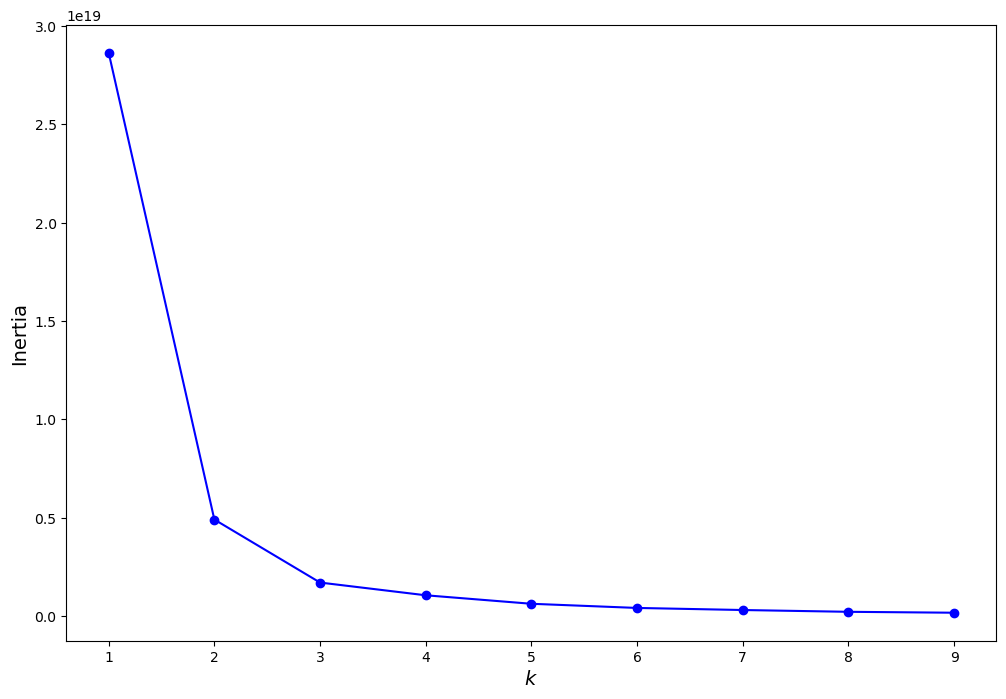

In [141]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

Optimim number of clusters by elbow method is 3, as we see a significant linear decrease form 1 to 2 and 2 to 3

In [142]:
k = 3
kmeans = KMeans(random_state=42,n_clusters = k)

In [143]:
cluster_data = cluster_data.iloc[:,:-1]

E:\AAAA DSML\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


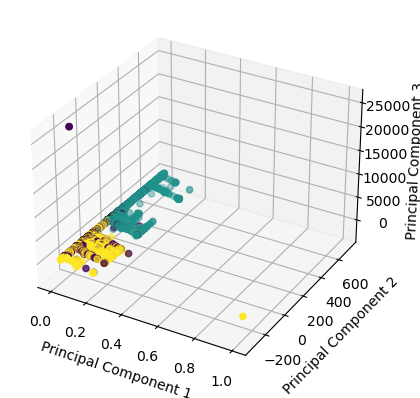

In [144]:
kmeans.fit(scaled_data)

cluster_data["kmLabels"] = kmeans.labels_

pca = PCA(n_components=3)
data_3d = pca.fit_transform(cluster_data.iloc[:,:-1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=cluster_data['kmLabels'], cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

### Hierarchical clustering

In [145]:
hier_data = cluster_data.iloc[:,:-1].sample(2000)

In [146]:
Z = sch.linkage(hier_data, method='ward') #linkage = ward

Text(0, 0.5, 'distance')

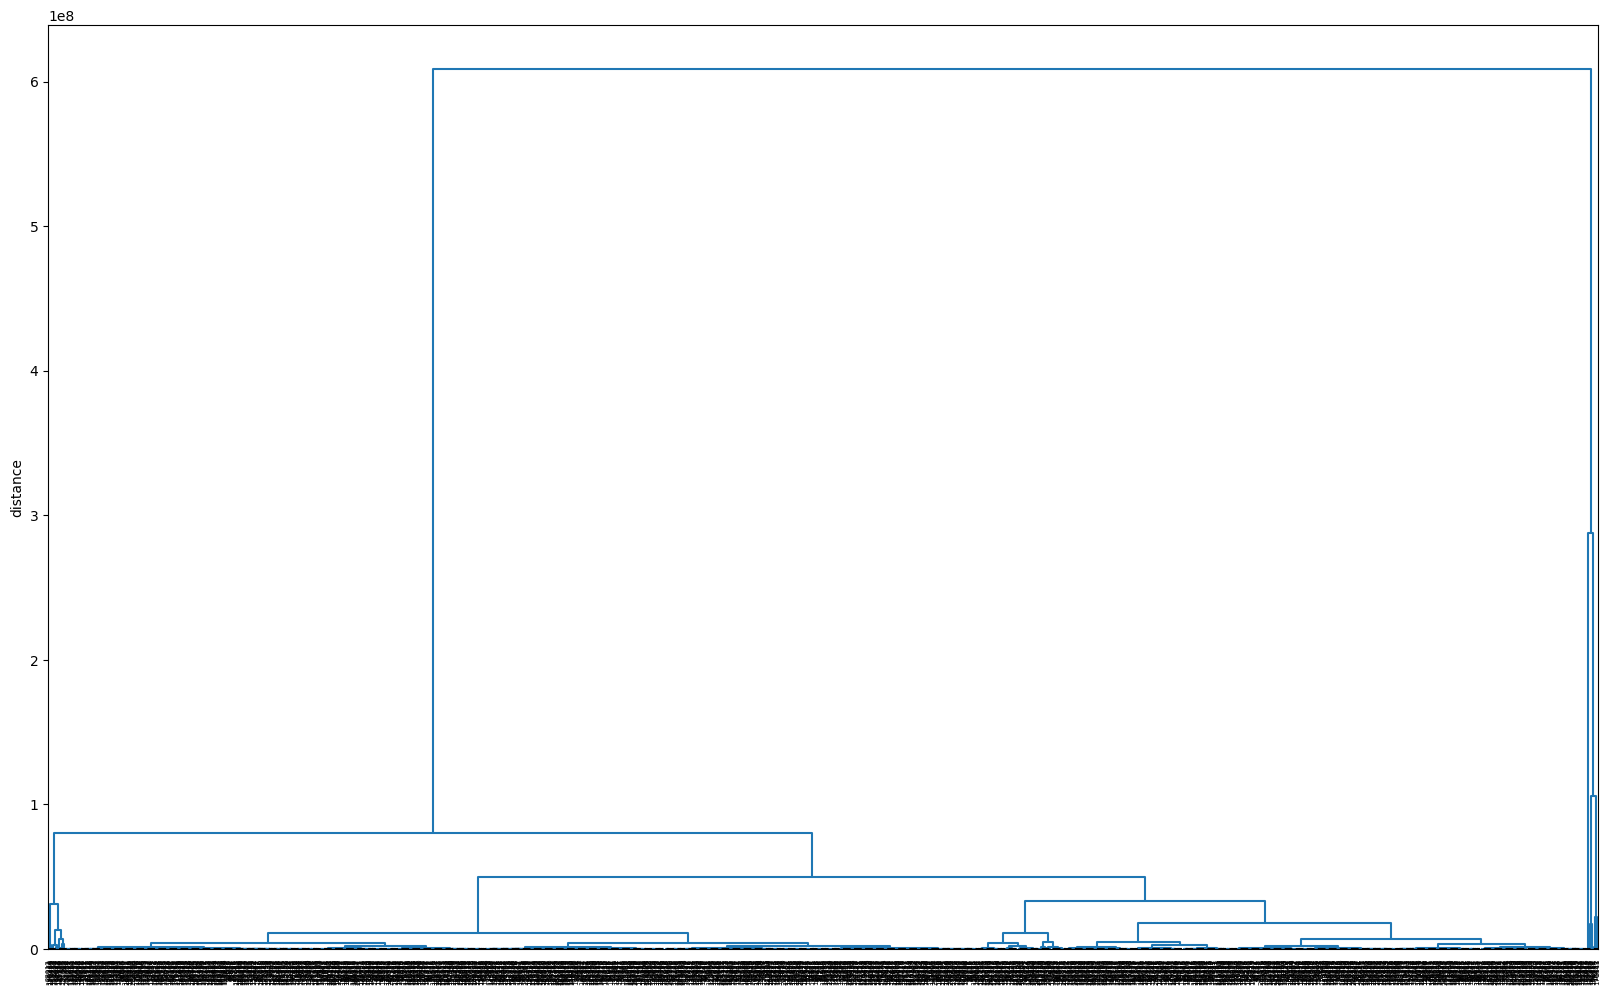

In [147]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=hier_data.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=2, color='k', linestyle='--')
ax.set_ylabel('distance')

Hierarchical clustering is done on a sample of data as it requires a lot on time to compute

## Insights

- We can see missing data in company hash, orgyear and job position. job position has almost 25 percent missing values
- Most of the employees are backend engineers(43k+) followed by fullstack engineers(24k+), there's also the other category, not sure what role it is. There's lot of manual entry error. There are also job positions names just ".", "...".
- we donot see much of outliers in any other columns except ctc. There might be some sort of error due to manual entry.
- We have high correlation between jobposition and email hash, which is expected as the emails hash is specific to their company.
- We see a negative correlation between orgyear and YOP. which is expected as joining date increases,  years of experience decreases.
- As the company names are not available we cannot conclude much on these data. But can only show it in the form of table.

## Recommendations

- Addressing the manual entry errors and inconsistencies in the "job position" column. We could clean up entries like ".", "...", and any other anomalies.
- Investigate outliers in the "ctc" column. Determine whether these are genuine data points or if there are errors in manual entry.
- The absence of company names limits the ability to draw conclusions about specific companies. If possible, try to provide the company names.
